# Project 4 - Group 1

In this project, you are going to explore matrix factorization methods for recommender system. The goal is to match consumers with most appropriate products. Matrix factorization methods characterize both items and users by vectors of factors inferred from item rating patterns. High correspondence between item and user factors leads to a recommendation. Matrix factorization generally has 3 parts:
+ factorization algorithm

+ regularization

+ postpocessing

Our group's project aims to compare 
+ A1+P2
+ A1+P2+R1+R2
+ A1+P2+R3
That is, to compare effect of regularizations given (A1+P2)

## Step 1 Load Data and Train-test Split

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('/Users/nicholeyao/Downloads/fall2019-project4-sec1-grp1-master 6/lib')

In [2]:
data = pd.read_csv('../data/ml-latest-small/ratings.csv')
few_comments_idx = data['movieId'].value_counts()<5
few_comments_idx = few_comments_idx.index

test_data = data[(data['movieId'].isin(few_comments_idx))].sample(frac = .2)
train_data = data.drop(test_data.index)
train_data.shape[0],test_data.shape[0]

(80669, 20167)

## Step 2 Matrix Factorization

### Step 2.1 Algorithm and Regularization

In [3]:
import time
from Matrix_Factorization_A1 import Matrix_Factorization as mf

### Basic Model: A1+ P2

In [4]:
start = time.time()
model = mf(data, train_data,test_data)
model.gradesc(f = 10,lam = 0, lrate = 0.01,epoch = 10,stopping_deriv = 0.01)
est_rating = model.KNN(k=1,test_point=data)
finish = time.time()
print('traing time: {:.2f}s'.format(finish - start))
model.predict(train_data,test_data)
finish_predict = time.time()
print('predict time: {:.2f}s'.format(finish_predict - finish))

traing time: 74.05s
training RMSE: 1.1779724681554604
test RMSE: 1.3872030754514906
predict time: 1.52s


### A1+ R1+ R2 + P2

In [6]:
start = time.time()
model_bias = mf(data, train_data,test_data)
model_bias.gradesc_bias(f = 10,lam = 0.3, lrate = 0.01,epoch = 10,stopping_deriv = 0.01)
est_rating = model_bias.KNN(k=1,test_point=data)
finish = time.time()
print('traing time: {:.2f}s'.format(finish - start))
model_bias.predict(train_data,test_data)
finish_predict = time.time()
print('predict time: {:.2f}s'.format(finish_predict - finish))

traing time: 48.47s
training RMSE: 1.293427249987574
test RMSE: 1.299690120010309
predict time: 1.34s


### A1+ R3 + P2

In [9]:
start = time.time()
model_dy = mf(data, train_data,test_data)
model_dy.gradesc_dynamic(f=10,lam=0.3, lrate=0.01, epoch=10)
est_rating = model_dy.KNN(k=1,test_point=data)
finish = time.time()
print('traing time: {:.2f}s'.format(finish - start))
model_dy.predict(train_data,test_data)
finish_predict = time.time()
print('predict time: {:.2f}s'.format(finish_predict - finish))

traing time: 193.99s
training RMSE: 1.951583236864158
test RMSE: 1.9360600415169795
predict time: 1.04s


### Step 2.2 Parameter Tuning

### 2.2.1：f

##### Basic Model: A1 + P2

In [31]:
result = []
for f in [5,10,15,20,90]:
    model = mf(data, train_data,test_data)
    model.gradesc(f = f,lam = 0, lrate = 0.01,epoch = 10,stopping_deriv = 0.01)
    est_rating = model.KNN(k=1,test_point=data)
    result.append(model.predict(train_data,test_data))

training RMSE: 1.0984582783593824
test RMSE: 1.3016001457608517
training RMSE: 1.0426084981463608
test RMSE: 1.2578322157164394
training RMSE: 1.300533933120139
test RMSE: 1.461901053073905
training RMSE: 3.6541551386777122
test RMSE: 3.650276891059406
training RMSE: 3.654237437638881
test RMSE: 3.650334646761977


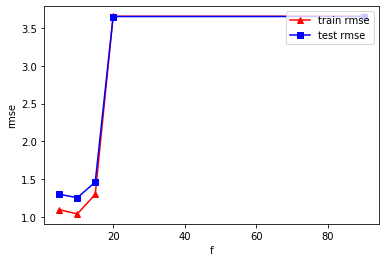

In [34]:
train_rmse_M1 = [result[i][0] for i in range(len(result))]
test_rmse_M1 = [result[i][1] for i in range(len(result))]
np.savetxt('basic_train_rmse_tuning.txt',train_rmse_M1)
np.savetxt('basic_test_rmse_tuning.txt',test_rmse_M1)

plt.plot([5,10,15,20,90], train_rmse_M1, color="red", linestyle="-", marker="^", label = 'train rmse')
plt.plot([5,10,15,20,90], test_rmse_M1, color="blue", linestyle="-", marker="s", label = 'test rmse')
plt.legend(loc='upper right')
plt.xlabel("f")
plt.ylabel("rmse")

plt.show() 

##### A1 + R1 + R2 + P2:

In [49]:
result = []
for f in [5,10,15,20,90]:
    model_bias = mf(data, train_data,test_data)
    model_bias.gradesc_bias(f = f,lam = 0.001, lrate = 0.01,epoch = 10, stopping_deriv = 0.01)
    est_rating = model_bias.KNN(k=1,test_point=data)
    result.append(model_bias.predict(train_data,test_data))

training RMSE: 1.3223373698631826
test RMSE: 1.3252156736544904
training RMSE: 1.2962208328629423
test RMSE: 1.2980139200522365
training RMSE: 1.2904905942119202
test RMSE: 1.2845556782098815
training RMSE: 1.2975434469893226
test RMSE: 1.3058939290140286
training RMSE: 1.3068941268431356
test RMSE: 1.3122343321219547


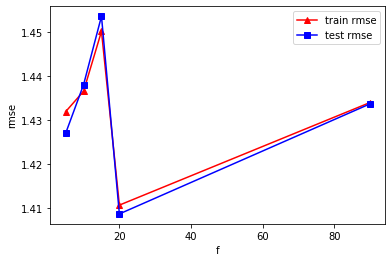

In [21]:
train_rmse_M2_f = [result[i][0] for i in range(len(result))]
test_rmse_M2_f = [result[i][1] for i in range(len(result))]
np.savetxt('bias_train_rmse_tuningf.txt',train_rmse_M2_f)
np.savetxt('bias_test_rmse_tuningf.txt',test_rmse_M2_f)

plt.plot([5,10,15,20,90], train_rmse_M2_f, color="red", linestyle="-", marker="^", label = 'train rmse')
plt.plot([5,10,15,20,90], test_rmse_M2_f, color="blue", linestyle="-", marker="s", label = 'test rmse')
plt.legend(loc='upper right')
plt.xlabel("f")
plt.ylabel("rmse")

plt.show() 

##### A1 + R3+ P2:

In [18]:
result = []
for f in [5,10,15,20,90]:
    model_dy = mf(data, train_data,test_data)
    model_dy.gradesc_dynamic(f=f,lam=0.001, lrate=0.01, epoch=10)
    est_rating = model_dy.KNN(k=1,test_point=data)
    result.append(model_dy.predict(train_data,test_data))

training RMSE: 1.431912528890444
test RMSE: 1.427013817619412
training RMSE: 1.4365513546371012
test RMSE: 1.438035616075929
training RMSE: 1.450132340845962
test RMSE: 1.4535595998205524
training RMSE: 1.4107163880321216
test RMSE: 1.4087175967135313
training RMSE: 1.4339888674379977
test RMSE: 1.4336846014204663


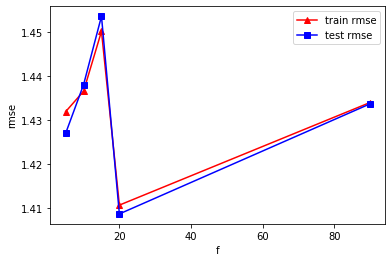

In [19]:
train_rmse_M3_f = [result[i][0] for i in range(len(result))]
test_rmse_M3_f = [result[i][1] for i in range(len(result))]
np.savetxt('dynamic_train_rmse_tuningf.txt',train_rmse_M3_f)
np.savetxt('dynamic_test_rmse_tuningf.txt',test_rmse_M3_f)

plt.plot([5,10,15,20,90], train_rmse_M3_f, color="red", linestyle="-", marker="^", label = 'train rmse')
plt.plot([5,10,15,20,90], test_rmse_M3_f, color="blue", linestyle="-", marker="s", label = 'test rmse')
plt.legend(loc='upper right')
plt.xlabel("f")
plt.ylabel("rmse")

plt.show()

### 2.2.1：lam

##### Basic Model: lam = 0

##### A1 + R1 + R2 + P2:

In [107]:
result = []
for lam in [0.0001, 0.001, 0.03, 0.1, 0.3]:
    model_bias = mf(data, train_data,test_data)
    model_bias.gradesc_bias(f = 10,lam = lam, lrate = 0.01,epoch = 10, stopping_deriv = 0.01)
    est_rating = model_bias.KNN(k=1,test_point=data)
    result.append(model_bias.predict(train_data,test_data))

training RMSE: 1.2088776313453533
test RMSE: 1.2018907322658954
training RMSE: 1.2088776313453533
test RMSE: 1.2018907322658954
training RMSE: 1.2088776313453533
test RMSE: 1.2018907322658954
training RMSE: 1.2088776313453533
test RMSE: 1.2018907322658954
training RMSE: 1.2088776313453533
test RMSE: 1.2018907322658954


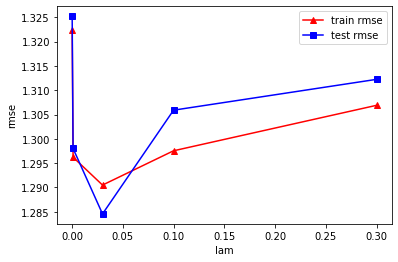

In [50]:
train_rmse_M2_lam = [result[i][0] for i in range(len(result))]
test_rmse_M2_lam = [result[i][1] for i in range(len(result))]
np.savetxt('bias_train_rmse_tuninglam.txt',train_rmse_M2_lam)
np.savetxt('bias_test_rmse_tuninglam.txt',test_rmse_M2_lam)

plt.plot([0.0001, 0.001, 0.03, 0.1, 0.3], train_rmse_M2_lam, color="red", linestyle="-", marker="^", label = 'train rmse')
plt.plot([0.0001, 0.001, 0.03, 0.1, 0.3], test_rmse_M2_lam, color="blue", linestyle="-", marker="s", label = 'test rmse')
plt.legend(loc='upper right')
plt.xlabel("lam")
plt.ylabel("rmse")

plt.show() 

##### A1 + R3 + P2:

In [11]:
result = []
for lam in [0.0001, 0.001, 0.03, 0.1, 0.3]:
    model = mf(data, train_data,test_data)
    model.gradesc_dynamic(f = 10,lam = lam, lrate = 0.01,epoch = 10)
    est_rating = model.KNN(k=1,test_point=data)
    result.append(model.predict(train_data,test_data))

training RMSE: 1.425170084960983
test RMSE: 1.4387183883256827
training RMSE: 1.458173487666712
test RMSE: 1.4567160821837177
training RMSE: 1.4737666976379025
test RMSE: 1.4684708044153854
training RMSE: 1.6522586551070415
test RMSE: 1.6459483393993743
training RMSE: 1.9822969127646433
test RMSE: 1.9811545108505149


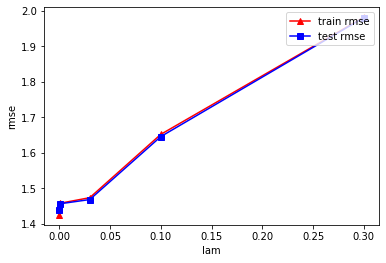

In [15]:
train_rmse_M3_lam = [result[i][0] for i in range(len(result))]
test_rmse_M3_lam = [result[i][1] for i in range(len(result))]
np.savetxt('dynamic_train_rmse_tuninglam.txt',train_rmse_M3_lam)
np.savetxt('dynamic_test_rmse_tuninglam.txt',test_rmse_M3_lam)

plt.plot([0.0001, 0.001, 0.03, 0.1, 0.3], train_rmse_M3_lam, color="red", linestyle="-", marker="^", label = 'train rmse')
plt.plot([0.0001, 0.001, 0.03, 0.1, 0.3], test_rmse_M3_lam, color="blue", linestyle="-", marker="s", label = 'test rmse')
plt.legend(loc='upper right')
plt.xlabel("lam")
plt.ylabel("rmse")

plt.show()

## Step 4 Conclusion

### With the same parameters: (f = 10, lam = 0.3, epoch = 10)

A1 + P2 :
training RMSE: 1.1779724681554604
test RMSE: 1.3872030754514906

A1 + R1 + R2 + P2:
training RMSE: 1.293427249987574
test RMSE: 1.299690120010309
    
A1 + R3 + P2:
training RMSE: 1.951583236864158
test RMSE: 1.9360600415169795

### With parameters after tuning:

In [20]:
start = time.time()
model = mf(data, train_data,test_data)
model.gradesc(f = 10,lam = 0, lrate = 0.01,epoch = 10,stopping_deriv = 0.01)
est_rating = model.KNN(k=1,test_point=data)
finish = time.time()
print('M1traing time: {:.2f}s'.format(finish - start))
model.predict(train_data,test_data)
finish_predict = time.time()
print('M1predict time: {:.2f}s'.format(finish_predict - finish))


start = time.time()
model_bias = mf(data, train_data,test_data)
model_bias.gradesc_bias(f = 20,lam = 0.01, lrate = 0.01,epoch = 10,stopping_deriv = 0.01)
est_rating = model_bias.KNN(k=1,test_point=data)
finish = time.time()
print('M2traing time: {:.2f}s'.format(finish - start))
model_bias.predict(train_data,test_data)
finish_predict = time.time()
print('M2predict time: {:.2f}s'.format(finish_predict - finish))


start = time.time()
model_dy = mf(data, train_data,test_data)
model_dy.gradesc_dynamic(f=20,lam=0.0001, lrate=0.01, epoch=10)
est_rating = model_dy.KNN(k=1,test_point=data)
finish = time.time()
print('M3traing time: {:.2f}s'.format(finish - start))
model_dy.predict(train_data,test_data)
finish_predict = time.time()
print('M3predict time: {:.2f}s'.format(finish_predict - finish))


M1traing time: 62.33s
training RMSE: 1.1601664096651256
test RMSE: 1.3788696474750948
M1predict time: 1.00s
M2traing time: 37.49s
training RMSE: 1.2852873715610862
test RMSE: 1.277546072448086
M2predict time: 0.97s
M3traing time: 163.91s
training RMSE: 1.4119053614401895
test RMSE: 1.4076442066471793
M3predict time: 0.99s


A1 + P2 :
training RMSE: 1.1601664096651256
test RMSE: 1.3788696474750948

A1 + R1 + R2 + P2:
training RMSE: 1.2852873715610862
test RMSE: 1.277546072448086
    
A1 + R3 + P2:
training RMSE: 1.4119053614401895
test RMSE: 1.4076442066471793 

By comparing the RMSEs, we can see that although RMSE is not improved significantly, by adding regularization, the difference between training RMSE and test RMSE is smaller, indicating that the problem of overfitting is improved through regularization. 

With R1 and R2, although the RMSE of training set did not improve, we did have a more accurate prediction for test dataset. 

With temporal dynamic regularization, we did not find a higher RMSE than our base model. One of the reasons could be that there are many parameters that we can choose, and the parameters that we found might not be the most approprate one base on the dataset. Notice that after we tuned two of our parameters, RMSE did decrease a lot.  
